# Лабораторная работа №2. Дискретные LTI системы.

Лаборатория цифровой обработки сигналов, ФРКТ МФТИ


Дискретные LTI системы (англ. Linear time-invariant system) — линейные стационарные дискретные системы.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import signal
import scipy
import time
import jax
import jax.numpy as jnp

In [2]:

# test_mat_size = 2048
# test_filt_size = 5
# 
# test_mat = np.random.rand(test_mat_size, test_mat_size)
# test_filt = np.random.rand(test_filt_size, test_filt_size)
# %timeit scipy.signal.convolve2d(test_mat, test_filt)
# 
# # with jax.default_device(jax.devices("cpu")[0]):
# key = jax.random.key(0)
# key, sub = jax.random.split(key)
# test_mat_jax = jax.random.normal(sub, (test_mat_size, test_mat_size))
# key, sub = jax.random.split(key)
# test_mat_jax = jax.random.normal(sub, (test_filt_size, test_filt_size))
# %timeit jax.scipy.signal.convolve2d(test_mat, test_filt).block_until_ready()
# 

# Модуль 1. Линейная дискретная свертка.

## Задача 1.1. Линейная дискретная свертка прямоугольных окон 

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|    $M$    | 4 | 5 | 6 | 4 | 5 | 6 | 8 | 7 | 8 | 7 |

Вычислить аналитически линейную дискретную свертку двух одинаковых последовательностей $x[k]$ и $h[k]$, таких, что 
$$x[k]=h[k]=\sum_{m=0}^{M-1}\mathbf{1} [k-m], $$ 
где $M$ соответствует варианту, непосредственно воспользовавшись формулой линейной дискретной свертки
$$y[k]=\sum_{m=-\infty}^{\infty} x[m] h[k-m].$$

Проверить результаты с помощью моделирования, воспользовавшись функцией `signal.convolve`

In [3]:
def task_1_1():
    M = 8
    x = np.ones(M)
    h = np.ones(M)
    conv_size = 2 * M - 1
    from_formula = np.zeros(conv_size)
    for i in range(0, conv_size):
        upper_bound = min(M - 1, i)
        lower_bound = max(0, i - (M - 1))
        from_formula[i] = np.sum(np.ones(upper_bound - lower_bound + 1))

    conv = scipy.signal.convolve(x, h)
    plt.plot(conv)
    plt.grid()
    plt.xlabel("k values")
    plt.ylabel("h[k]")
    plt.title("Modeled by scipy.signal")
    plt.show()
    plt.plot(from_formula)
    plt.title("Evaluated from formulas")
    plt.grid()
    plt.xlabel("k values")
    plt.ylabel("h[k]")
    plt.show()

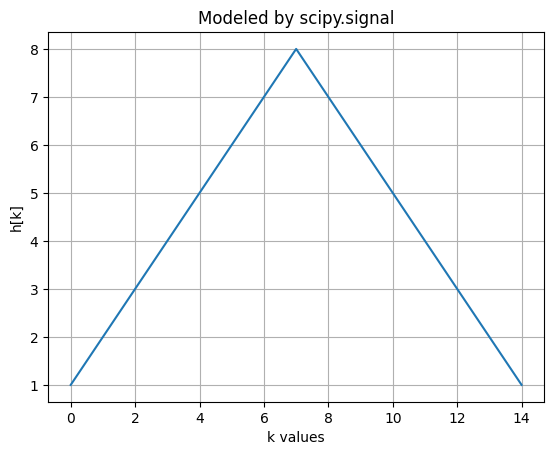

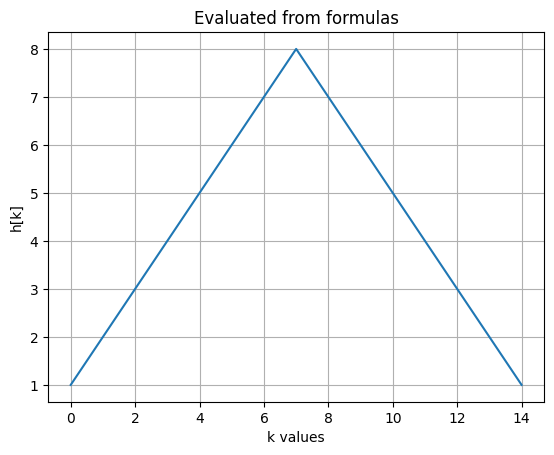

In [4]:
task_1_1()

## Задача 1.2. Эффективное вычисление свертки 




| Варианты: |   $1$ |    $2$ |    $3$ |    $4$ |    $5$ |    $6$ |    $7$ |    $8$ |    $9$ |    $10$ |  
|:---------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|    $N$    | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ |
|$n_0$| $128$ | $32$ | $256$ | $64$ | $512$ | $1024$ | $230$ | $325$ | $501$ | $1000$ |

Даны последовательности отсчетов
$$ x[k]= \cos(2\pi kn_0/N)$$  
$$ h[k]= \sin(2\pi kn_0/N)$$  
где $n_0$, $N$ взять из таблицы сверху в соответствии с вариантом и $k$ пробегает значения от $0$ до $N-1.$  
Вычислить их линейную дискретную свертку c помощью `signal.convolve()` двумя способами: с помощью прямого вычисления по формуле свёртки и с использованием алгоритма БПФ.  
Сравнить вычислительную эффективность, сделать вывод. 

P.S. На вычисление свертки по формуле может потребоваться значительное колличество времени. 



In [5]:
def task_1_2():
    N = 2 ** 17
    n_0 = 230
    k_values = np.arange(N)
    x = np.cos(2 * np.pi * n_0 * k_values / N)
    h = np.sin(2 * np.pi * n_0 * k_values / N)

    # with jax.default_device(jax.devices("cpu")[0]):
    #     arr_test = (2 * np.pi * n_0 / N) * jnp.arange(N, dtype=jnp.int32)
    #     cpu_device = jax.devices("cpu")[0]
    #     print(arr_test.devices())
    #     x_gpu = jnp.cos(arr_test)
    #     h_gpu = jnp.sin(arr_test)
    #     gpu_start = time.perf_counter()
    #     gpu_conv = jnp.convolve(x_gpu, h_gpu).block_until_ready()
    #     gpu_end = time.perf_counter()
    #     print(f"with jax passed {gpu_end - gpu_start}")

    # direct method
    direct_start = time.perf_counter()
    direct_conv = np.convolve(x, h)
    direct_end = time.perf_counter()

    # fft method using scipy
    scipy_fft_start = time.perf_counter()
    scipy_fft_conv = signal.convolve(x, h)
    scipy_fft_end = time.perf_counter()
    print(f"with scipy using method=fft passed {scipy_fft_end - scipy_fft_start}")

    # fft method
    len_conv = N + N - 1
    fft_start = time.perf_counter()
    fft_x = np.fft.fft(x, len_conv)
    fft_h = np.fft.fft(h, len_conv)
    fft_product = np.multiply(fft_x, fft_h)
    fft_conv = np.fft.ifft(fft_product, len_conv)
    fft_end = time.perf_counter()

    is_same = np.allclose(fft_conv, direct_conv)

    print(f"time passed: direct method {direct_end - direct_start}; fft method: {fft_end - fft_start}, got the same result: {is_same}")
    plt.plot(fft_conv)
    plt.grid()
    plt.xlabel("k values")
    plt.ylabel("h[k]")
    plt.show()
    plt.plot(direct_conv)
    plt.grid()
    plt.xlabel("k values")
    plt.ylabel("h[k]")
    plt.show()

with scipy using method=fft passed 0.0180653510033153
time passed: direct method 0.9389168750058161; fft method: 0.04095241500181146, got the same result: True


/home/lexotr/miniconda3/envs/ml_fun/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/lexotr/miniconda3/envs/ml_fun/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


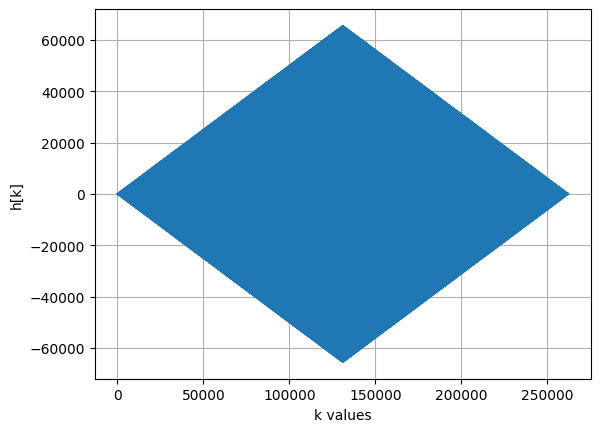

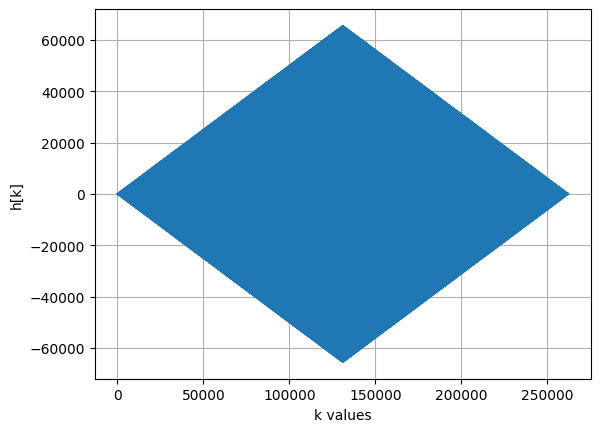

In [6]:
task_1_2()

# Модуль 2. Характеристики LTI систем.






## Задача 2.1. Фильтр скользящего среднего

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|$M_1$|  9 | 14 | 13 |  9 | 12 |  11 | 14 | 13 |  9 | 12 |
|$M_2$| 29 | 50 | 40 | 24 | 50 |  45 | 50 | 40 | 24 | 50 |
| $K$ | 35 | 63 | 57 | 35 | 63 |  55 | 63 | 57 | 35 | 63 |
| $N$ |100 |140 |130 |100 |140 | 115 |140 | 130 | 100 | 140 |

Рассмотрите фильтр скользящего среднего

$$y[k]=\dfrac{1}{M}\sum_{m=0}^{M-1} x[k-m]$$

для $M = M_1$ и $M = M_2$ (из таблицы): 

* Определите и изобразите импульсную характеристику $h[k]$ фильтра.

* Вычислите с помощью `signal.convolve` отклик $y[k]$ фильтра на входное воздействие вида
$$ x_{noise}[k] = \sin(2\pi k / K) + \varepsilon[k], 0\le k\le N-1.$$
где $K,\;N$ — соответствующие числа из таблицы, $\varepsilon[k]$ — белый гаусовский шум (`np.random.normal(mu, sigma, N)`) с нулевым среднем `mu=0` и  среднеквадратическим отклонением $\sigma=0.1$ (`sigma=0.1`).  
* Сравните сигналы $x_{noise}[k]$, $y[k]$ и 
$$ x[k] = \sin(2\pi k / K), 0\le k\le N-1.$$
* Определите и изобразите амплитудно-частотную характеристику (АЧХ) $|H(\nu)|$ фильтра. Как выбор $M$ влияет на результат фильтрации отрезка гармонического сигнала?

In [18]:
import scipy.signal

def apply_average(x, window_size):
    print("applying_average")
    responce = np.zeros(x.size)
    for i in range(responce.size):
        start_ind = max(0, i - window_size + 1)
        sub_range = x[start_ind : i + 1]
        responce[i] = np.sum(sub_range) / window_size

    return responce



def task_2_1():
    M_1 = 14
    M_2 = 50
    K = 63
    N = 140
    mu = 0
    sigma = 0.1

    impulse = np.zeros(N)
    impulse[0] = 1
    imp_responce = np.zeros(N)
    for i in range(impulse.size):
        start_ind = max(0, i - M_2 + 1)
        sub_range = impulse[start_ind : i + 1]
        imp_responce[i] = np.sum(sub_range) / M_2
    plt.plot(impulse)
    plt.grid()
    plt.xlabel("k values")
    plt.ylabel("Amplitude of impulse")
    plt.show()
    plt.plot(imp_responce)
    plt.grid()
    plt.xlabel("k values")
    plt.ylabel("h[k]")
    plt.show()

    k_values = np.arange(N)

    x = np.sin(2 * np.pi * k_values / K)
    plt.plot(x)
    plt.grid()
    plt.xlabel("k values")
    plt.ylabel("x[k]")
    plt.title("Plot of x[k] without noise")
    plt.show()
    white_noise = np.random.normal(mu, sigma, N)
    noised = x + white_noise
    plt.plot(noised)
    plt.xlabel("k values")
    plt.ylabel("x[k] + eps[k]")
    plt.title("Plot of x[k] with noise")
    plt.grid()
    plt.show()

    result = scipy.signal.convolve(noised, imp_responce)[:noised.size]
    plt.plot(result)
    plt.xlabel("k values")
    plt.ylabel("y[k]")
    plt.title("Noised after filter")
    plt.grid()
    plt.show()
    
    
    plt.plot(np.arange(-0.5, 0.5, 1 / len(imp_responce)), np.fft.fftshift(np.abs(np.fft.fft(imp_responce))))
    plt.xlabel("nu values")
    plt.ylabel("|H(nu)|")
    plt.title("frequency responce")
    plt.grid()
    plt.show()

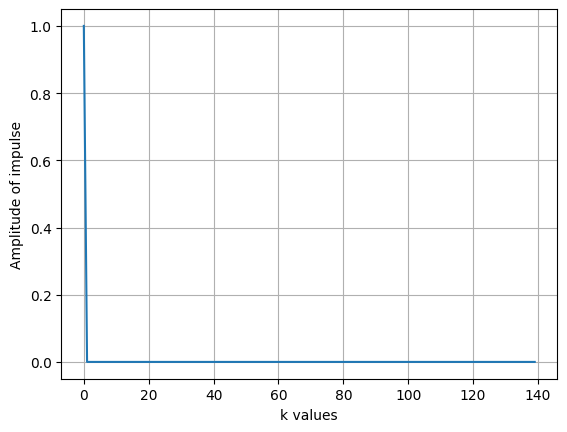

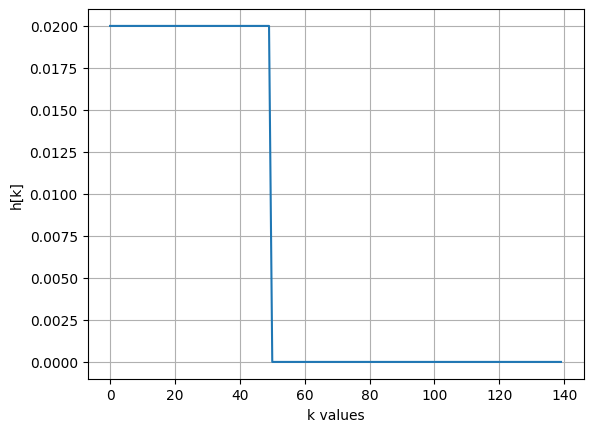

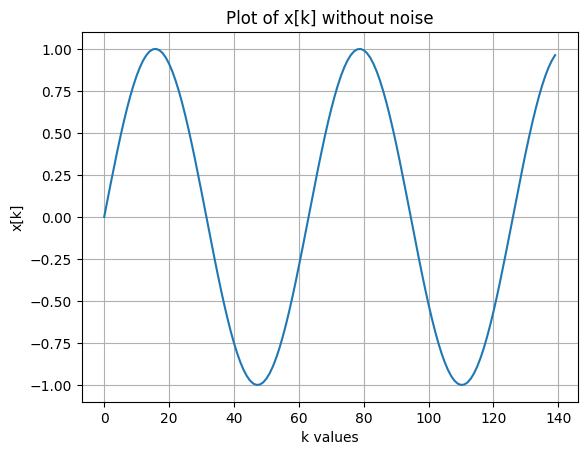

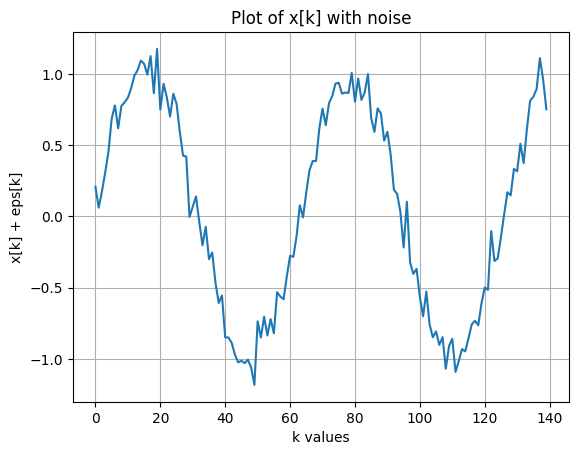

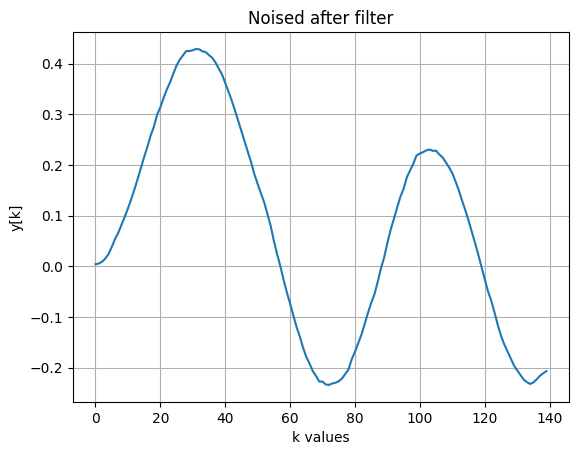

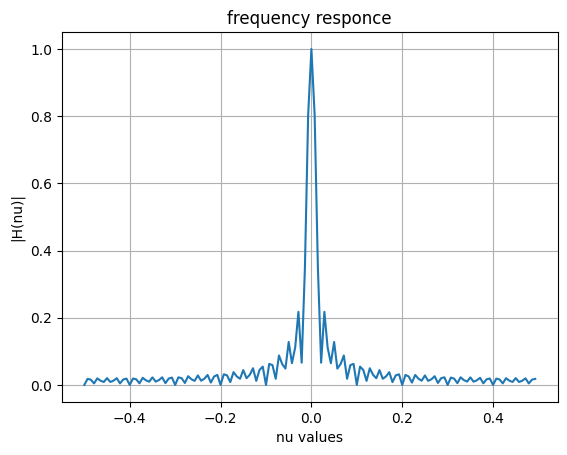

In [19]:
task_2_1()

## Задача 2.2. Двухкаскадный фильтр

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |   7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
| $a$ |  1 |  1 |  1 |  1 |  1 |  1 |  1 |  1 |  1 |  1 |
| $b$ |0.8 |0.7 |0.6 |0.8 |0.7 |0.6 |0.6 |0.8 |0.7 |0.6 |
| $c$ |0.5 |0.4 |0.3 |0.5 |0.3 |0.4 |0.3 |0.5 |0.3 |0.4 |
| $M$ | 50 | 60 | 50 | 50 | 50 | 60 | 50 | 50 | 50 | 60 |
| $N$ |180 |200 |220 |180 |200 |220 |220 |180 |200 |220 |

Рассмотрите двухкаскадный фильтр, каскады которого задаются следующими разностными уравнениями. 

1) $$y[k]=\dfrac{ax[k]+bx[k-M]+cx[k-2M]}{a+b+c}$$

где $a$, $b$, $c$ и $M$ заданы в таблице с вариантами.

2) $$y[k]=\dfrac{x[k]+x[k-1]}{2}.$$

Подайте на вход такого  фильтра любой сгенерированный сигнал $x[k]$ длительностью $N$ отсчетов. Измениться ли выход системы от перестановки порядка каскадов? Проведите моделирование с использованием функции `signal.convolve`

In [24]:
def first_filter(x, M, a, b, c):
    responce = np.zeros(x.size)
    for i in range(responce.size):
        new_elem = a * x[i]
        if i >= M:
            new_elem += b * x[i - M]
        if i >= 2 * M:
            new_elem += c * x[i - 2 * M]

        responce[i] = new_elem / (a + b + c)

    return responce

def second_filter(x):
    x_rotated = np.roll(x, 1)
    responce = (x + x_rotated) / 2
    return responce

def task_2_2():
    a = 1
    b = 0.6
    c = 0.3
    M = 50
    N = 220
    
    impulse = np.zeros(N)
    impulse[0] = 1
    imp_responce_first = first_filter(impulse, M, a, b, c)
    imp_responce_second = second_filter(impulse)
    plt.plot(impulse)
    plt.grid()
    plt.xlabel("k values")
    plt.ylabel("amplitude of impulse")
    plt.title("Impulse")
    plt.show()

    plt.plot(imp_responce_first)
    plt.grid()
    plt.xlabel("k values")
    plt.ylabel("h_1[k]")
    plt.title("First filter impulse responce")
    plt.show()

    plt.plot(imp_responce_second)
    plt.grid()
    plt.xlabel("k values")
    plt.ylabel("h_2[k]")
    plt.title("Second filter impulse responce")
    plt.show()
    
    k_values = np.arange(N)

    x = np.sin(2 * np.pi * k_values / N)
    x = np.array([1 for i in range(40)] + [0 for i in range(120)] + [1 for i in range(40)])
    plt.plot(x)
    plt.grid()
    plt.xlabel("k values")
    plt.ylabel("x[k]")
    plt.title("Plot of signal to convolve")
    plt.show()
 
    first = signal.convolve(x, imp_responce_first)[:x.size]
    plt.plot(first)
    plt.grid()
    plt.xlabel("k values")
    plt.ylabel("h_1[k]")
    plt.title("Signal after convolving 1")
    plt.show()

    first_then_second = signal.convolve(first, imp_responce_second)[:x.size]
    plt.plot(first_then_second)
    plt.grid()
    plt.xlabel("k values")
    plt.ylabel("h_1_2[k]")
    plt.title("Signal after convolving 1 - 2")
    plt.show()
    
    second = signal.convolve(x, imp_responce_second)[:x.size]
    plt.plot(second)
    plt.grid()
    plt.xlabel("k values")
    plt.ylabel("h_2_1[k]")
    plt.title("Signal after convolving 2")
    plt.show()
    
    second_then_first = signal.convolve(second, imp_responce_first)[:x.size]
    plt.plot(second_then_first)
    plt.grid()
    plt.xlabel("k values")
    plt.ylabel("h_2_1[k]")
    plt.title("Signal after convolving 2 - 1")
    plt.show()


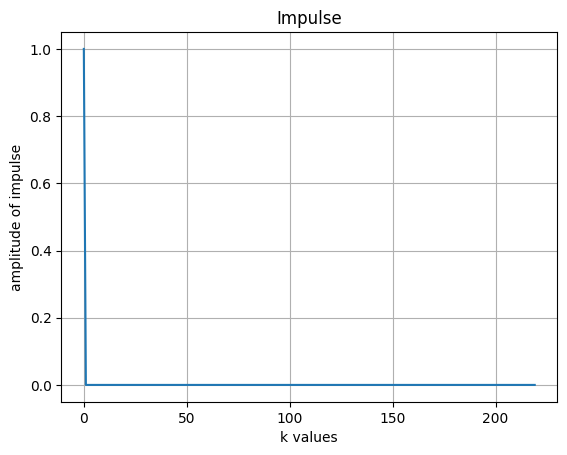

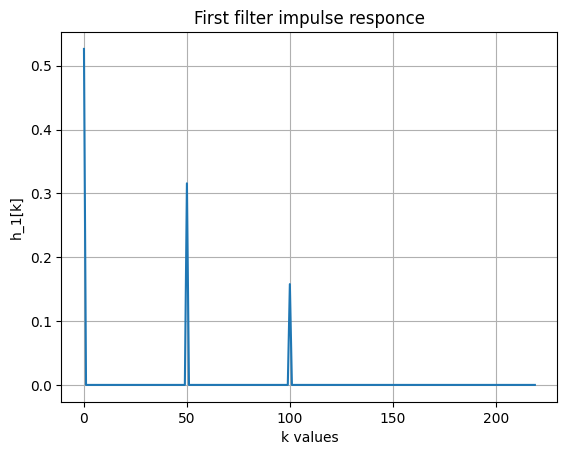

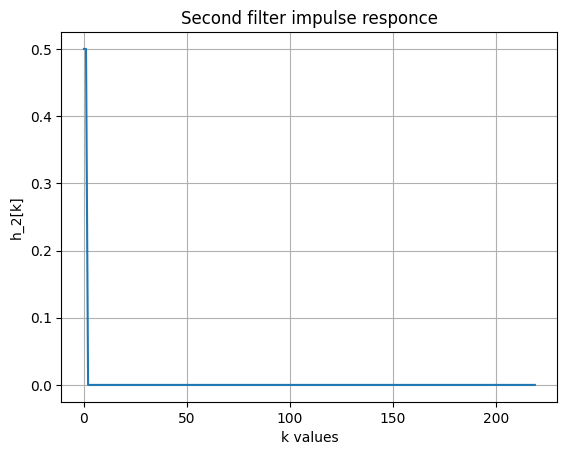

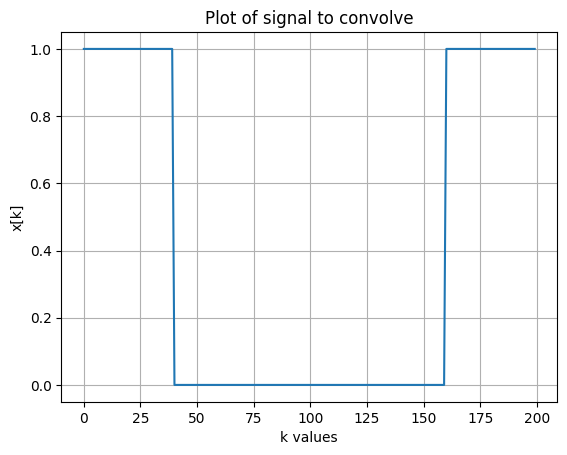

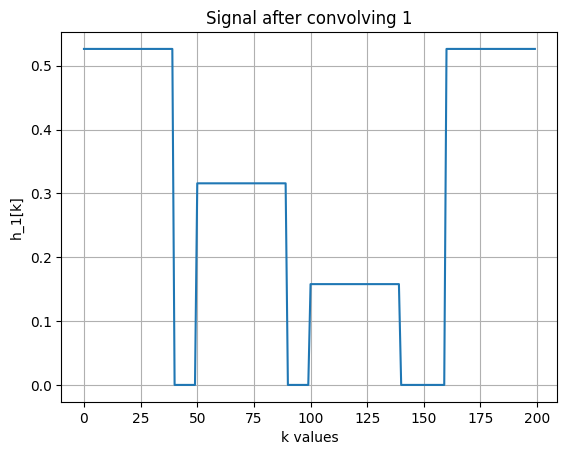

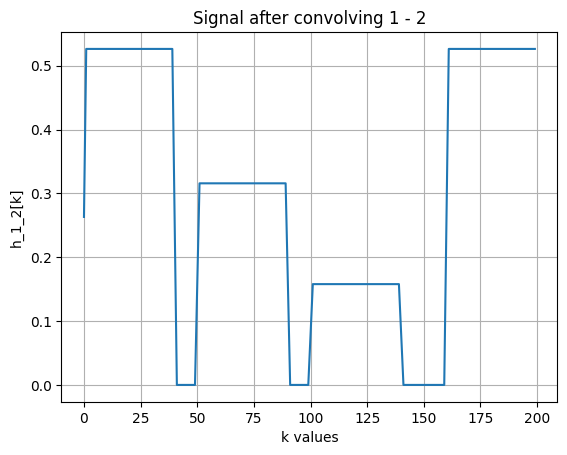

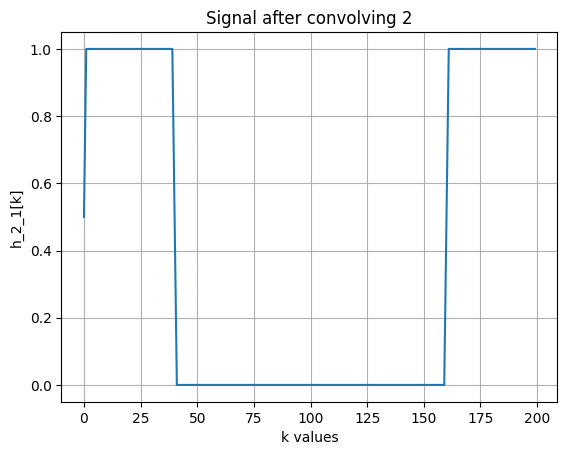

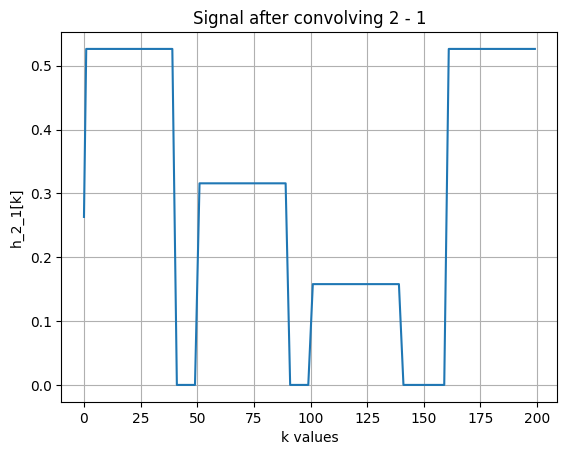

In [25]:
task_2_2()

# Модуль 3. Аппроксимация идеальных частотно-избирательных фильтров и явление Гиббса

## Задача 3.1. Явление Гиббса для каузальной аппроксимации ИФНЧ

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |   7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $\nu_c$  |0.1 |0.2 |0.3 |0.1 |0.2 |0.3 |0.2 |0.3 |0.1 | 0.2 |
|    $N$    | 30 | 20 | 30 | 20 | 30 | 20 | 24 | 22 | 26 | 28 |

Рассмотрите фильтр с импульсной характеристикой
$$
h[k] =
\left\{\begin{array}{l}
\dfrac{\sin(2\pi\nu_c (k-N))}{\pi (k-N)}, 0\le k \le 2N-1
\\
0, \; \text{при других } k.
\end{array}\right.
$$
для случая $\nu_c,\; N$ из варианта. 

Вычислите с помощью моделирования и постройте график АЧХ этого фильтра.  
Как изменяется АЧХ с ростом $N$ при фиксированной частоте среза $\nu_c$?

In [34]:
def task_3_1(N = 24):
    nu = 0.2
    k_values = np.arange(2 * N - 1)
    imp_respone = np.divide(np.sin(2 * np.pi * nu * (k_values - N)), np.pi * (k_values - N))
    imp_respone[N] = 2 * nu
    
    impulse = np.zeros(2 * N - 1)
    impulse[0] = 1
    
    impulse_fft = np.fft.fftshift(np.fft.fft(impulse))
    impulse_after_filter_fft = np.fft.fftshift(np.fft.fft(imp_respone))
    
    freq_responce_exp = np.divide(impulse_after_filter_fft, impulse_fft)

    # freq_responce = np.fft.fftshift(np.fft.fft(imp_respone))

    plt.plot(np.linspace(-0.5, 0.5, len(k_values)), np.abs(freq_responce_exp))
    plt.grid()
    plt.xlabel("nu values")
    plt.ylabel("|H[nu]|")
    plt.title("Frequency responce")
    plt.show()



/tmp/ipykernel_314294/2337120381.py:4: RuntimeWarning: invalid value encountered in divide
  imp_respone = np.divide(np.sin(2 * np.pi * nu * (k_values - N)), np.pi * (k_values - N))


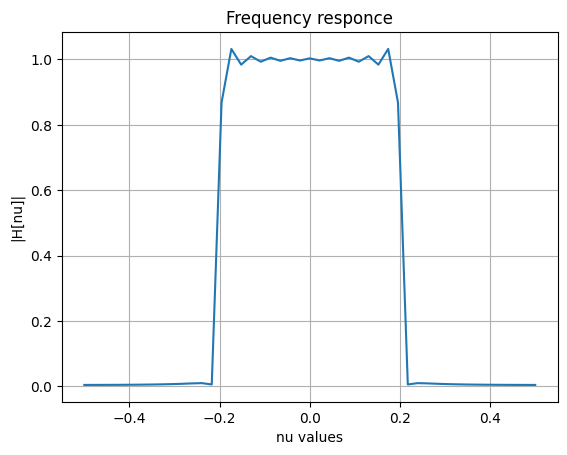

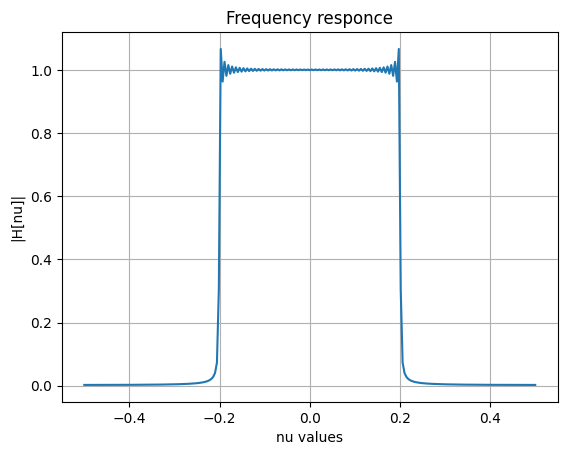

In [36]:
task_3_1(24)
task_3_1(120)

## Задача 3.2.  Аппроксимация фильтра с заданной частотной характеристикой с помощью ДВПФ   

Определить импульсную характеристику $h_{ideal}[k]$ фильтра, частотная характеристика которого является действительной функцией частоты и представлена на рисунке. 

Рассмотреть фильтр, импульсная характеристика которого в отличии от $h_{ideal}[k]$  усечена до $2N$ отсчетов и сдвинута на $N$ отсчетов вправо. С помощью моделирования определить и построить график АЧХ. Сравнить АЧХ обоих фильтров.

Рисунок генерируется с помощью функции `task_3_2(variant)` (приведенной ниже), где `variant` – номер варианта. 

In [13]:
import numpy as np
import matplotlib.pyplot as plt 
def task_3_2(variant):
    nu_c1 = [0.2, 0.15, 0.15, 0.1, 0.15, 0.15, 0.2, 0.15, 0.15, 0.1]
    amp1 = [1,  0, 0.2, 1, 1, 0.6, 0.3, 0.2, 1, 1]
    nu_c2 = [0.4, 0.35, 0.4,  0.3,  0.35,  0.4, 0.4,  0.3,  0.35,  0.4]
    amp2 = [0.4, 1, 1, 0.4, 0.7,  1, 1, 1, 0.4, 0.7]
    def H_val(nu, n):
        return amp1[n] if abs(nu)<=nu_c1[n] else amp2[n] if abs(nu)<=nu_c2[n] else 0.0
    nu=np.arange(-0.5, 0.5, 0.001)
    plt.figure(figsize=[6, 2], dpi=140)
    plt.plot(nu, [H_val(x, variant-1) for x in nu] ,'g-')
    plt.xticks([-0.5, -nu_c2[variant-1], -nu_c1[variant-1], 0, nu_c1[variant-1], nu_c2[variant-1], 0.5])
    plt.grid()
    plt.yticks([0, min(amp1[variant-1],amp2[variant-1]), 1])
    plt.xlim([-0.5, 0.5])
    plt.xlabel("Нормированнная частота, $\\nu$")
    plt.ylabel("$H(\\nu)$")
    plt.title("Вариант %i" %variant)
    plt.tight_layout()
    plt.show()

Пример вывода задания для первого варианта.

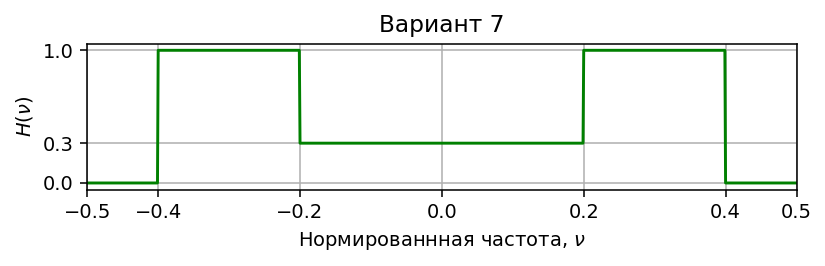

In [14]:
task_3_2(variant=7)

In [15]:
def eval_h_variant_7(nu_1, nu_2, k_arr):
    h = np.divide(np.sin(2 * np.pi * nu_1 * k_arr) - 0.7 * np.sin(2 * np.pi * nu_2 * k_arr), np.pi * k_arr)
    h[k_arr == 0] = 2 * nu_1 - 0.7 * 2 * nu_2
    return h


def task_3_2_solve():
    nu_1 = 0.4
    nu_2 = 0.2
    N = 100
 
    model_len = 2 * N + 1
    k = np.arange(2 * N)
    h_ideal = eval_h_variant_7(nu_1, nu_2, k)

    moved_k = k - N
    h_moved = eval_h_variant_7(nu_1, nu_2, moved_k)

    plt.plot(k, np.abs(h_ideal))
    plt.grid()
    plt.xlabel("k values")
    plt.ylabel("h_ideal[k]")
    plt.title("h_ideal[k]")
    plt.show()

    plt.plot(moved_k, np.abs(h_moved))
    plt.grid()
    plt.xlabel("k values")
    plt.ylabel("h_moved[k]")
    plt.title("h_moved[k]")
    plt.show()
    
    theta, H = signal.freqz(b=h_moved, worN=2**16, whole=True)
    nu=theta/(2*np.pi)-0.5
    H=np.fft.fftshift(H)
    plt.plot(nu, np.abs(H))
    plt.grid()
    plt.xlabel("nu")
    plt.ylabel("H[nu]")
    plt.title("H[nu] synthesized")
    plt.show()



/tmp/ipykernel_268719/2342992558.py:2: RuntimeWarning: invalid value encountered in divide
  h = np.divide(np.sin(2 * np.pi * nu_1 * k_arr) - 0.7 * np.sin(2 * np.pi * nu_2 * k_arr), np.pi * k_arr)


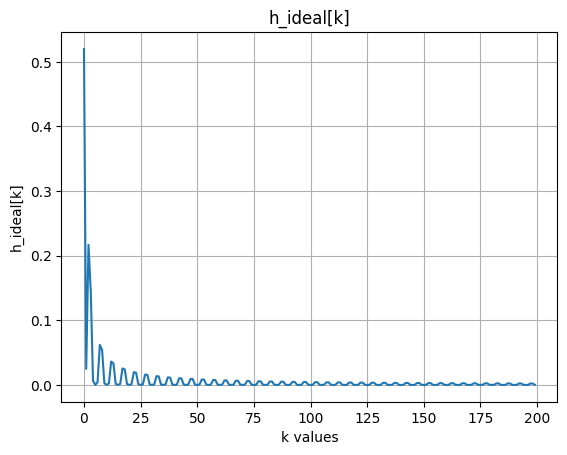

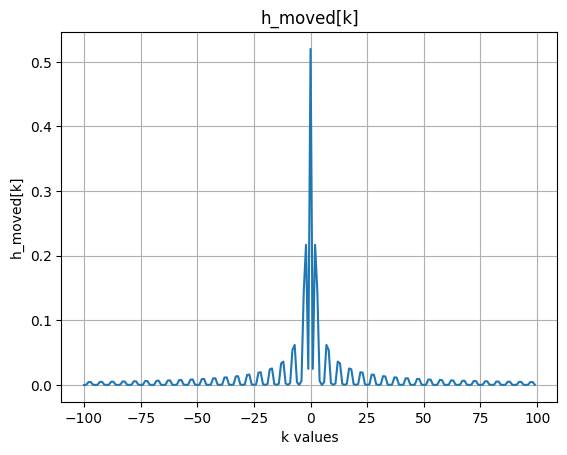

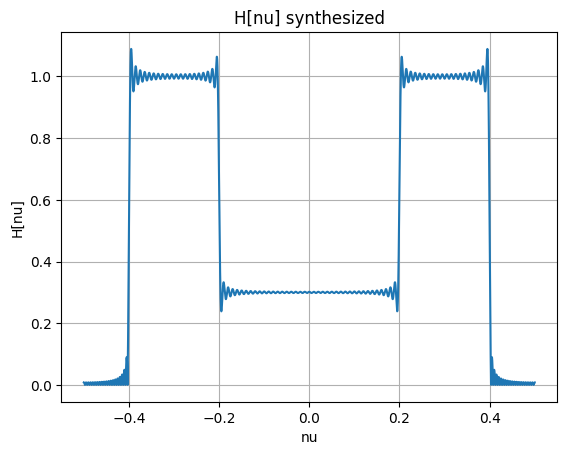

In [48]:
task_3_2_solve()